# Principal Component Analysis
Using 10kb thinned kin-free Blackfin tuna data. All markers (neutal + putative outliers) included.

In [38]:
library(adegenet)
library(ggplot2)
library(marmap)

Load in the data

In [2]:
bft <- read.genepop("../inputfiles/bft.kinless.gen", ncode = 3L, quiet = T)
metadata <- read.csv("../inputfiles/bft.strata", header = T)
pop(bft) <- metadata$pop4

## Perform the analysis

## Extract appropriate data

In [3]:
bft.mtx <- tab(bft, freq=TRUE, NA.method="mean")

### Perform the PCA

In [4]:
bft.pca <- dudi.pca(bft.mtx, center=TRUE, scale=FALSE, nf = 300L, scannf = F)
summary(bft.pca)

Class: pca dudi
Call: dudi.pca(df = bft.mtx, center = TRUE, scale = FALSE, scannf = F, 
    nf = 300L)

Total inertia: 89.76

Eigenvalues:
    Ax1     Ax2     Ax3     Ax4     Ax5 
 1.2859  0.8903  0.8433  0.8158  0.8073 

Projected inertia (%):
    Ax1     Ax2     Ax3     Ax4     Ax5 
 1.4326  0.9918  0.9394  0.9088  0.8994 

Cumulative projected inertia (%):
    Ax1   Ax1:2   Ax1:3   Ax1:4   Ax1:5 
  1.433   2.424   3.364   4.273   5.172 

(Only 5 dimensions (out of 323) are shown)



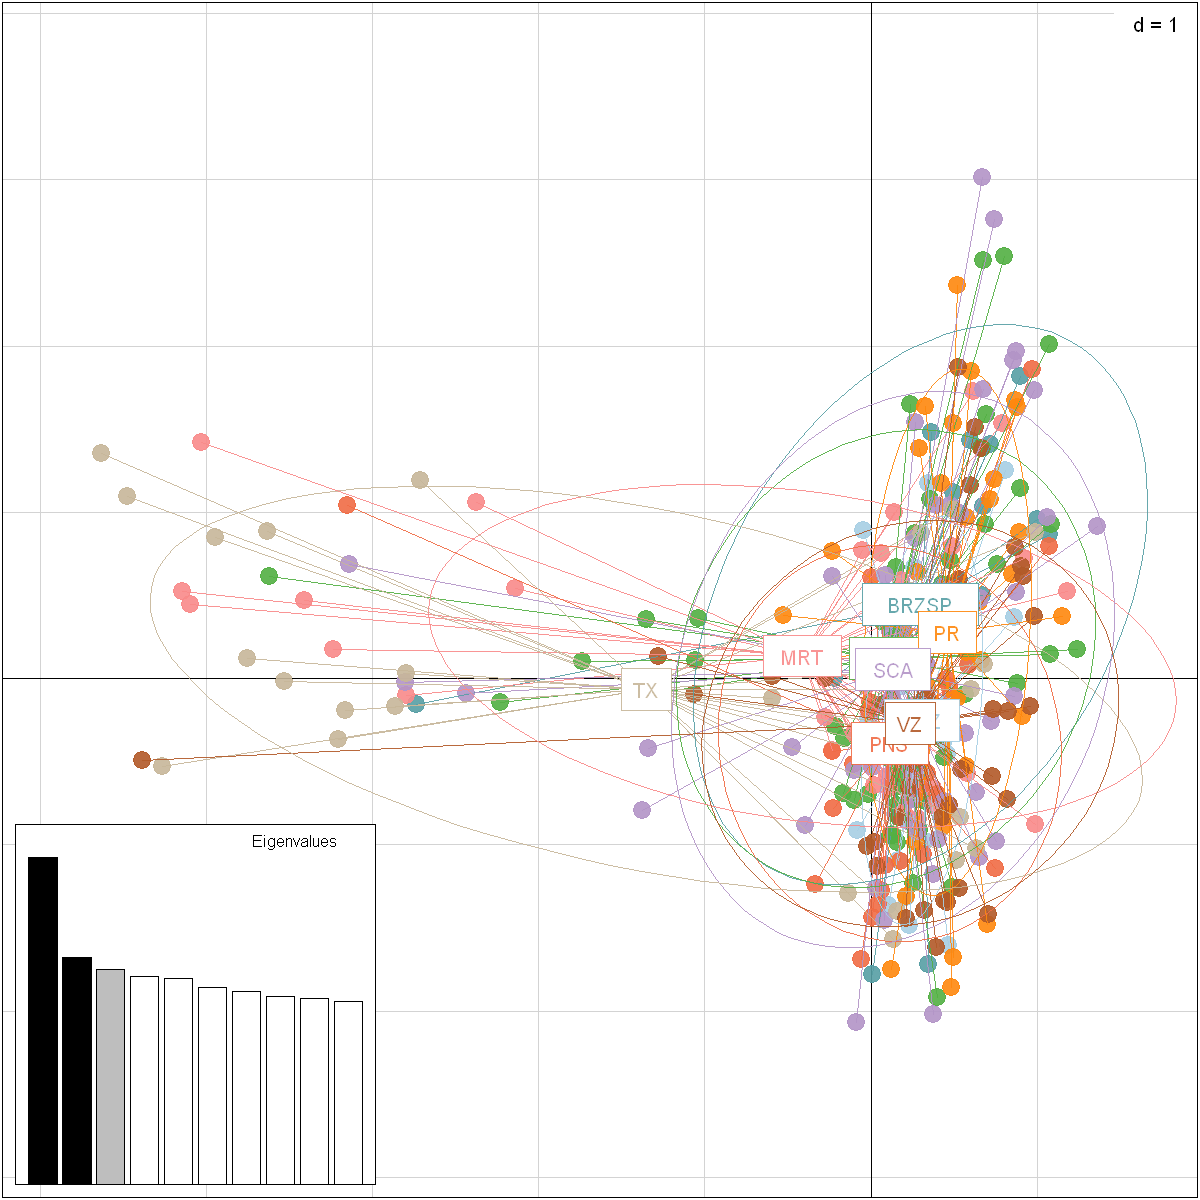

In [5]:
options(repr.plot.width=10, repr.plot.height=10)
s.class(
    bft.pca$li, fac=pop(bft),
    col=transp(funky(9),.9),
    axesel=FALSE, cstar=1, cpoint=3
)
add.scatter.eig(bft.pca$eig[1:10],3,1,2, ratio=.3)

## Principal Coordinate Analysis

In [6]:
bft.pco <- dudi.pco(dist(bft.mtx), scannf=FALSE, nf=300)

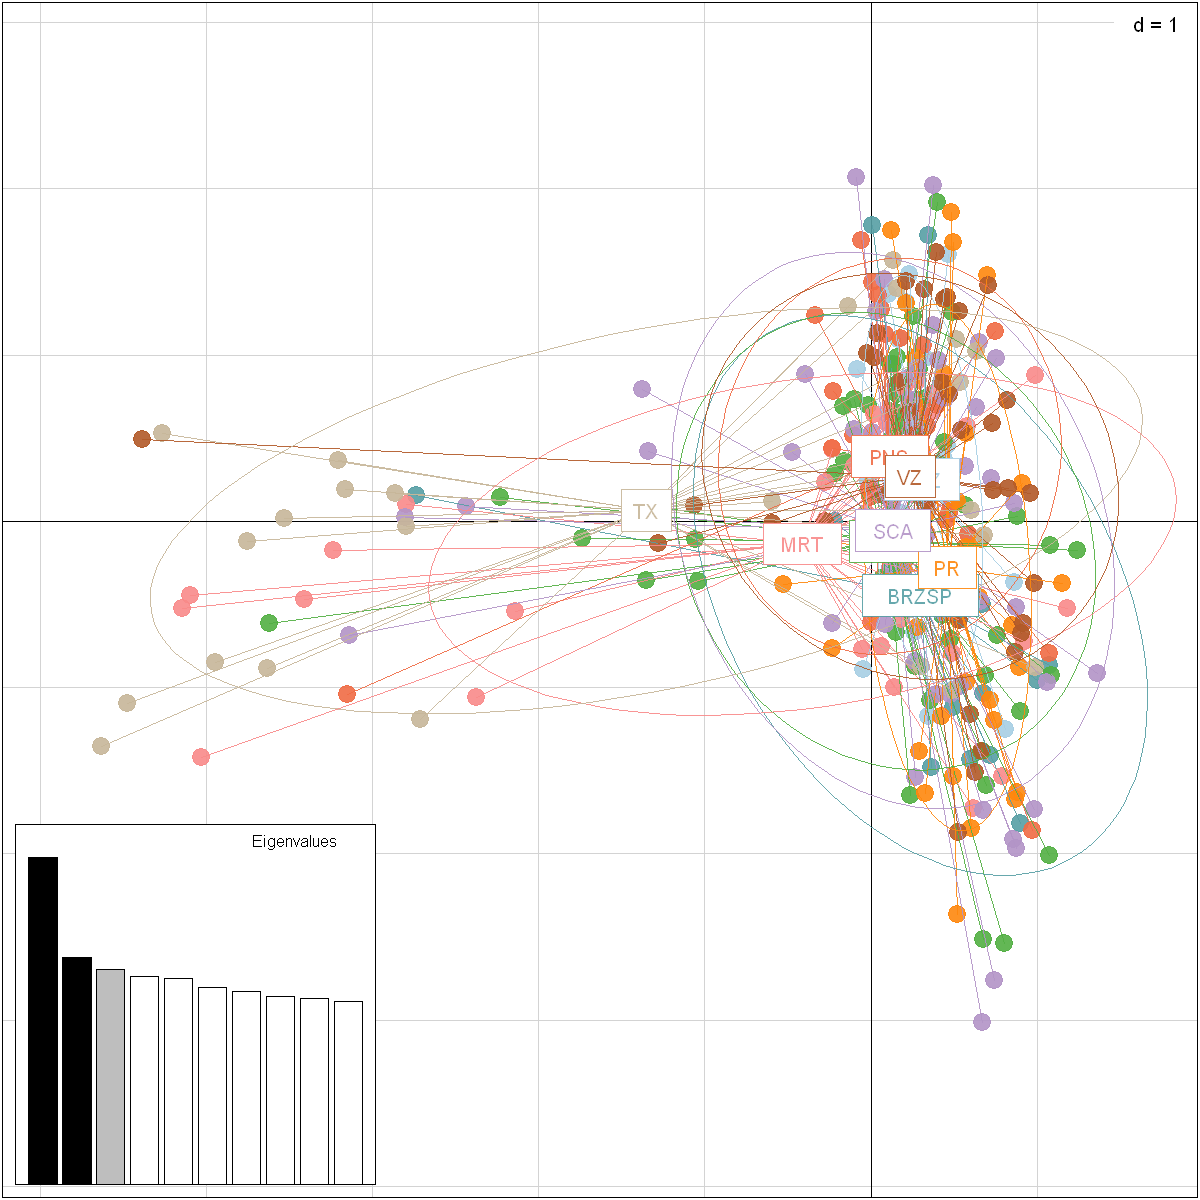

In [7]:
s.class(
    bft.pco$li, fac=pop(bft),
    col=transp(funky(9),.9),
    axesel=FALSE, cstar=1, cpoint=3
)
add.scatter.eig(bft.pco$eig[1:10],3,1,2, ratio=.3)

## Spatial Principal Component Analysis

Read in coordinate data. These coordinates have been approximated from landing area and jittered within locations.

In [8]:
unique(metadata$pop4)

[1] "BRZ"   "BRZSP" "KEY"   "MRT"   "PNS"   "PR"    "SCA"   "TX"    "VZ"

In [66]:
bft$other$xy <- as.matrix(metadata[, 8:7])
bft$other$xy[,1] <- jitter(bft$other$xy[,1], factor = 2)
bft$other$xy[,2] <- jitter(bft$other$xy[,2], factor = 2)
head(bft$other$xy)

longitude,latitude
-34.32572,-6.049509
-34.15206,-5.985147
-34.33394,-5.983679
-34.24445,-5.790804
-34.15408,-5.908134
-34.31947,-5.989006


Warning message in spca.genind(bft, type = 4, ask = FALSE, scannf = FALSE, nfposi = 2, :
"NAs in data are automatically replaced (to mean allele frequency)"


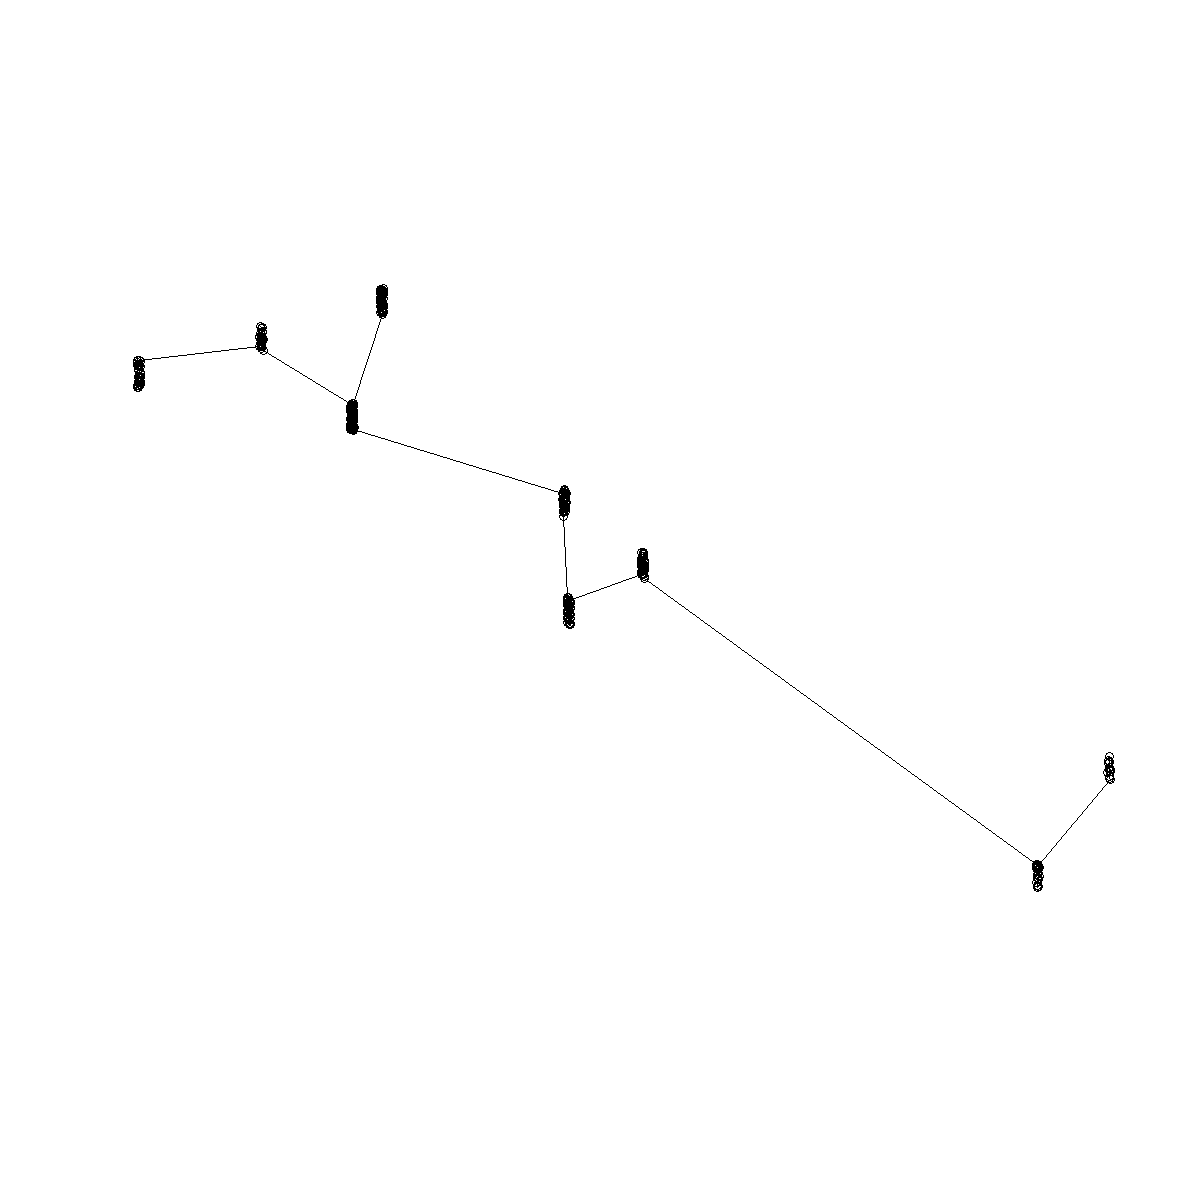

In [81]:
spca.res <- spca(bft, type=4, ask=FALSE, scannf=FALSE, nfposi=2, nfnega=1)

Plot eigenvalues of the analysis in decreasing order
- stored inside `$eig`

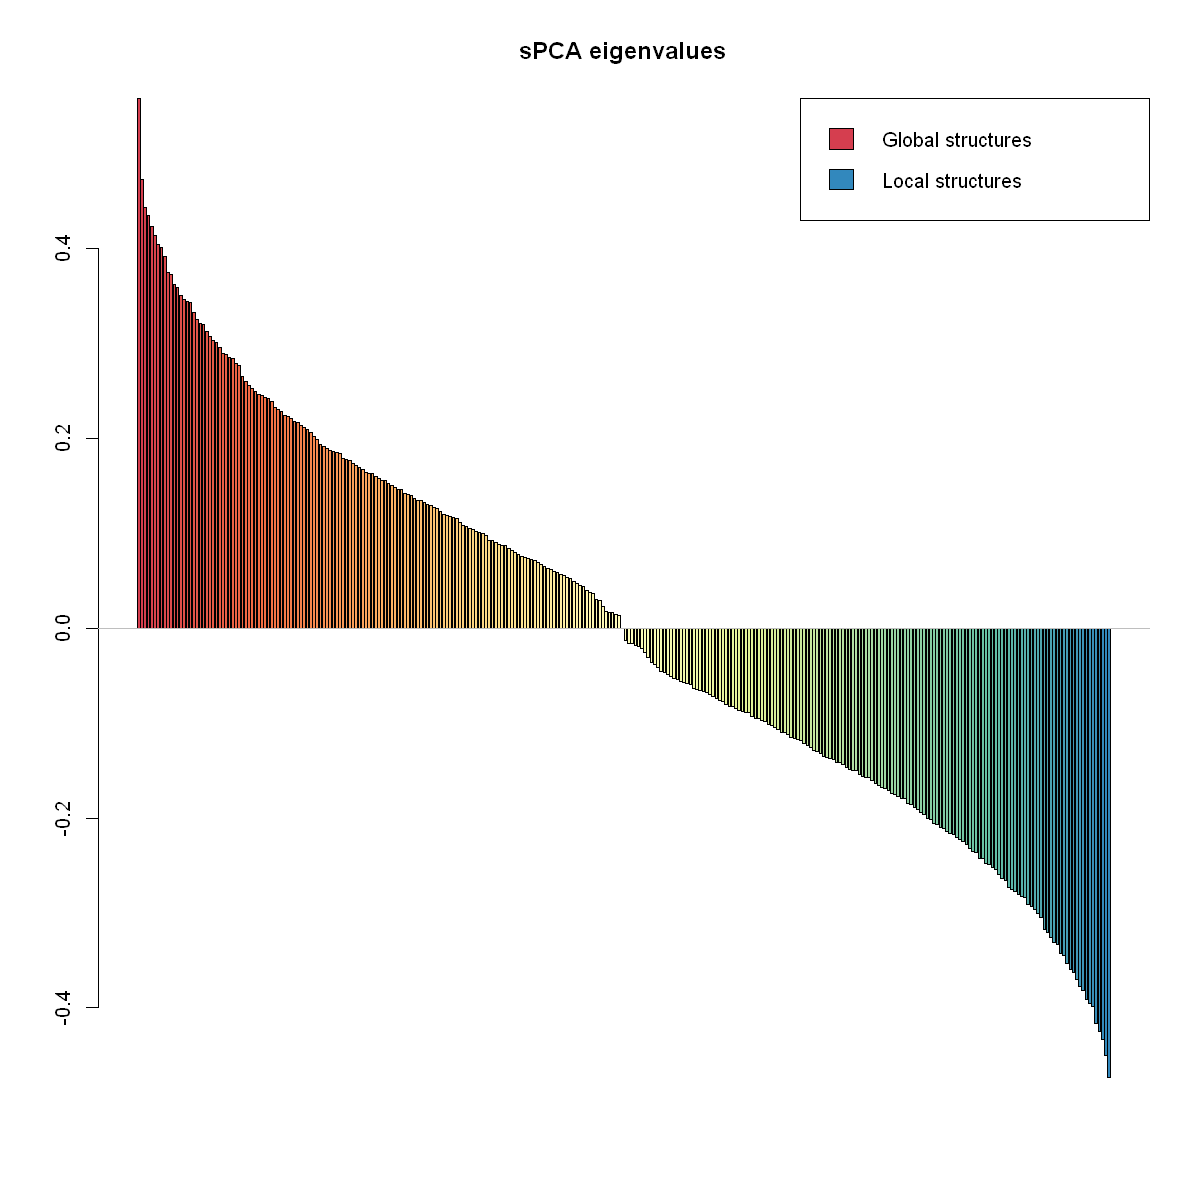

In [82]:
barplot(spca.res$eig, main="sPCA eigenvalues", col=spectral(length(spca.res$eig)))
legend("topright", fill=spectral(2),
       leg=c("Global structures", "Local structures"))
abline(h=0,col="grey")

### Plot the eigenvalues of the sPCA

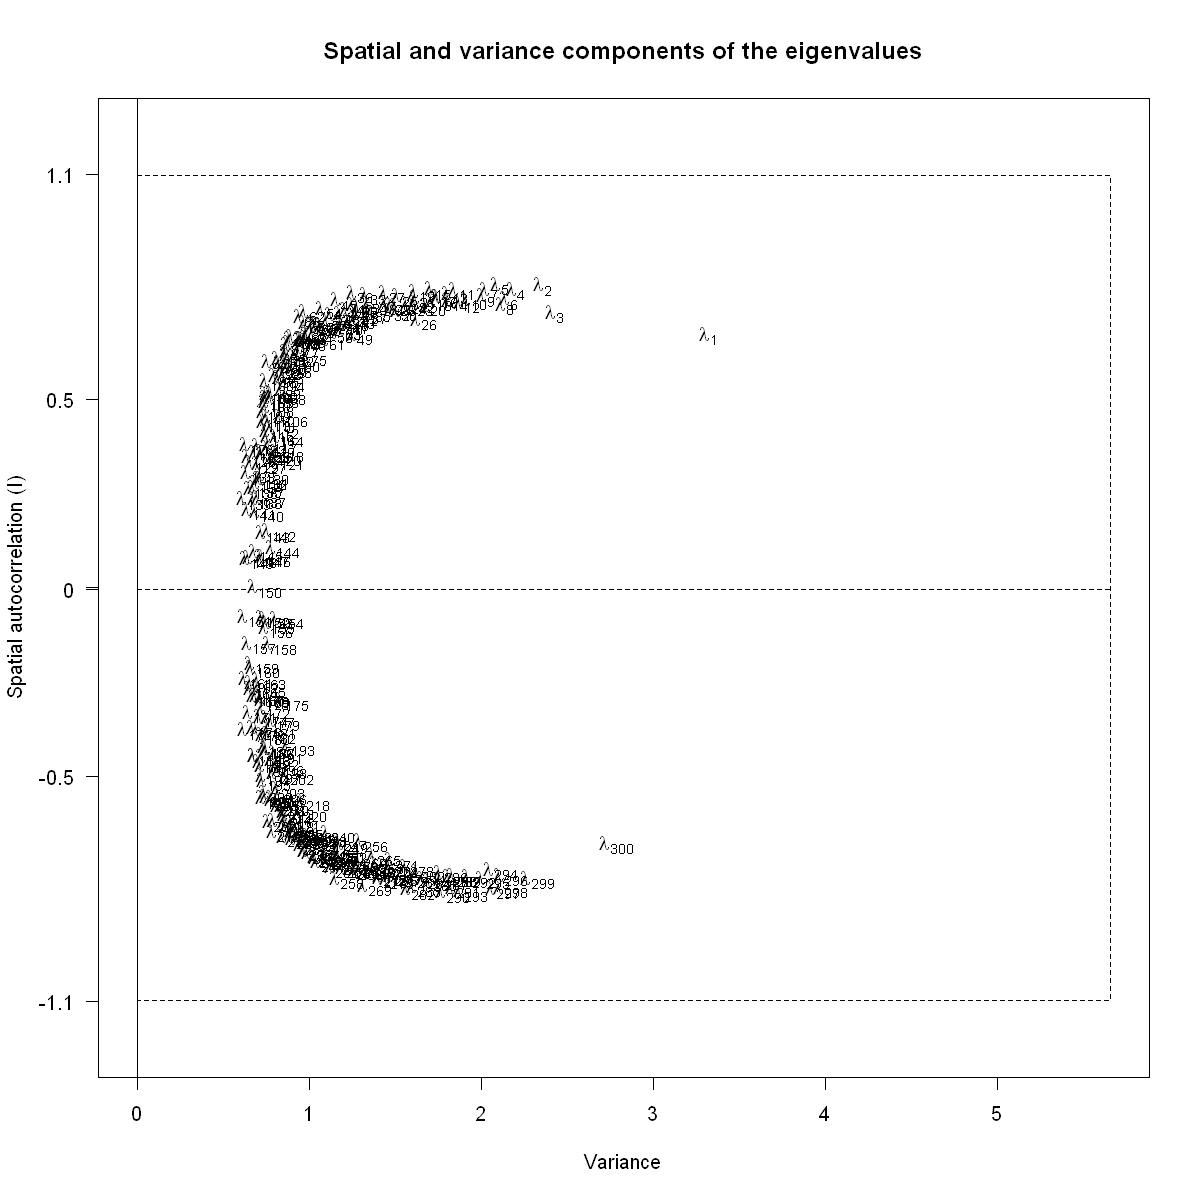

In [83]:
screeplot(spca.res)

### Plot spatial genetic structure of sPCA axes

Jitter for easier visualization

In [84]:
coords.jit <- bft$other$xy
coords.jit[,1] <- jitter(coords.jit[,1], factor = 4, amount = 0.9)
coords.jit[,2] <- jitter(coords.jit[,2], factor = 4, amount = 0.9)
head(coords.jit)

longitude,latitude
-33.49503,-6.396727
-34.68774,-6.683874
-35.20868,-6.232297
-34.41308,-6.258595
-33.36594,-5.400225
-33.81495,-5.259492


In [85]:
USbathy <- getNOAA.bathy(
    lon1 = -103, lon2 = -19,
    lat1 = 37, lat2 = -12, 
    resolution = 4
)

Querying NOAA database ...

This may take seconds to minutes, depending on grid size

Building bathy matrix ...



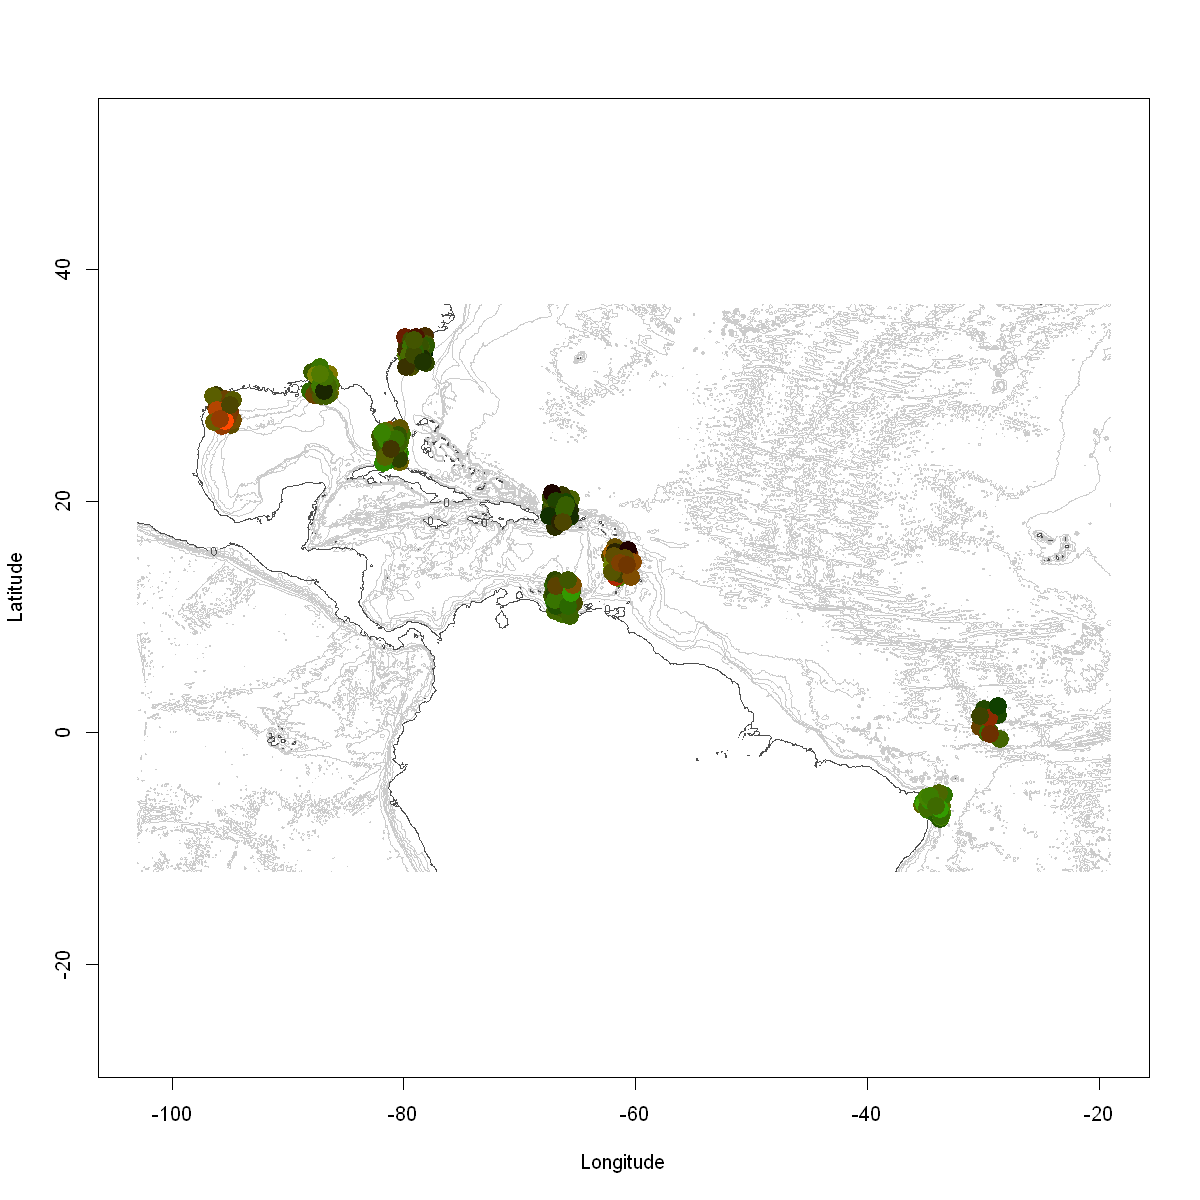

In [93]:
plot(
    USbathy, xlim = c(-103, -19), ylim = c(-12, 37),
    deep = c(-5000, -200, 0), shallow = c(-200, 0, 0),
    col = c("grey80", "grey80", "grey30"), step = c(1000, 200, 1),
    lty = c(1, 1, 1), lwd = c(0.6, 0.6, 1.2)
)
colorplot(coords.jit, spca.res$ls, axes=1:2, add.plot = T, alpha=0.5, cex=3)

In [92]:
png("spca.png",height = 1080, width = 1720)
plot(
    USbathy, xlim = c(-103, -19), ylim = c(-12, 37),
    deep = c(-5000, -200, 0), shallow = c(-200, 0, 0),
    col = c("grey80", "grey80", "grey30"), step = c(1000, 200, 1),
    lty = c(1, 1, 1), lwd = c(0.6, 0.6, 1.2)
)
colorplot(coords.jit, spca.res$ls, axes=1:2, add.plot = T, alpha=0.5, cex=3)
dev.off()

png 
  2